In [7]:
# ===============================
# FLIGHT DELAY BINARY CLASSIFICATION PIPELINE
# ===============================

# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# 1️⃣ Load Dataset
# ===============================
df = pd.read_csv(r"D:\Project DS Final\2025\Data Preprocessing\classification_encoded.csv")   # 👈 đổi tên file nếu khác
print("Data shape:", df.shape)
print(df.head())

Data shape: (50029, 16)
   MONTH  DAY_OF_MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER  ORIGIN  DEST  \
0      4             1            2                  0       1    62   
1      4             1            2                  0       1    62   
2      4             1            2                  0       4    14   
3      4             1            2                  0       4    14   
4      4             1            2                  0       4    14   

   CRS_DEP_TIME  CRS_ARR_TIME  CRS_ELAPSED_TIME  DISTANCE  \
0     -1.371023     -1.053675         -0.190881 -0.222270   
1      0.322520      0.511390         -0.285164 -0.222270   
2     -1.219136      0.012848          1.353008  1.492567   
3      0.014948      1.171957          1.364794  1.492567   
4      1.566096     -1.646583          1.364794  1.492567   

   HourlyDewPointTemperature  HourlyDryBulbTemperature  \
0                  -1.469068                 -2.530912   
1                  -1.469068                 -1.567803   
2 

In [9]:
# 2️⃣ Check and Handle Outliers (clip numeric features)
# ===============================
num_cols = ['CRS_DEP_TIME','CRS_ARR_TIME','CRS_ELAPSED_TIME','DISTANCE',
             'HourlyDewPointTemperature','HourlyDryBulbTemperature',
             'HourlyRelativeHumidity','HourlyVisibility','HourlyWindSpeed']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


In [10]:
# 3️⃣ Split Feature / Target
# ===============================
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']

In [11]:
# 4️⃣ Handle Class Imbalance (SMOTE)
# ===============================
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print("Class distribution after SMOTE:\n", y_res.value_counts())

Class distribution after SMOTE:
 DEP_DEL15
0.0    39853
1.0    39853
Name: count, dtype: int64


In [12]:
# 5️⃣ Train/Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [13]:
# 6️⃣ Scale Numeric Features
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# 7️⃣ Define Models
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Ridge Classifier": RidgeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [15]:
# 8️⃣ Train & Evaluate
# ===============================
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, digits=3))


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0      0.612     0.568     0.589      7971
         1.0      0.597     0.640     0.618      7971

    accuracy                          0.604     15942
   macro avg      0.604     0.604     0.603     15942
weighted avg      0.604     0.604     0.603     15942


Model: Ridge Classifier
              precision    recall  f1-score   support

         0.0      0.614     0.563     0.588      7971
         1.0      0.597     0.646     0.620      7971

    accuracy                          0.605     15942
   macro avg      0.605     0.605     0.604     15942
weighted avg      0.605     0.605     0.604     15942


Model: KNN
              precision    recall  f1-score   support

         0.0      0.797     0.675     0.731      7971
         1.0      0.718     0.828     0.769      7971

    accuracy                          0.751     15942
   macro avg      0.757     0.751     0.750     15942
weighted 

In [16]:
# 9️⃣ Display Comparison Table
# ===============================
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\n🔹 Model Performance Comparison:")
print(results_df)


🔹 Model Performance Comparison:
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.603751   0.596770  0.639819  0.617546
1     Ridge Classifier  0.604755   0.596756  0.646092  0.620445
2                  KNN  0.751411   0.718158  0.827625  0.769016
3        Random Forest  0.861623   0.877736  0.840296  0.858608


CRS_DEP_TIME                 0.135690
HourlyWindSpeed              0.107720
CRS_ARR_TIME                 0.096894
HourlyDewPointTemperature    0.089480
HourlyDryBulbTemperature     0.086209
CRS_ELAPSED_TIME             0.086103
HourlyRelativeHumidity       0.076059
DISTANCE                     0.067828
OP_UNIQUE_CARRIER            0.062798
DEST                         0.062458
dtype: float64


<Axes: title={'center': 'Top 10 Important Features'}>

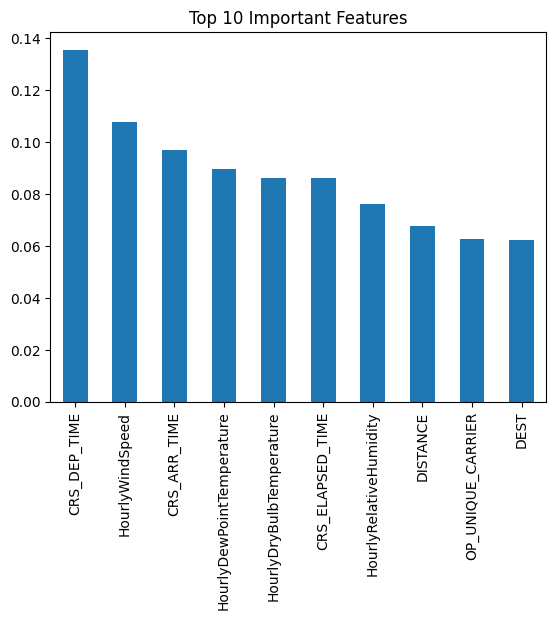

In [17]:
importances = models["Random Forest"].feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importance.head(10))
feat_importance.head(10).plot(kind='bar', title='Top 10 Important Features')


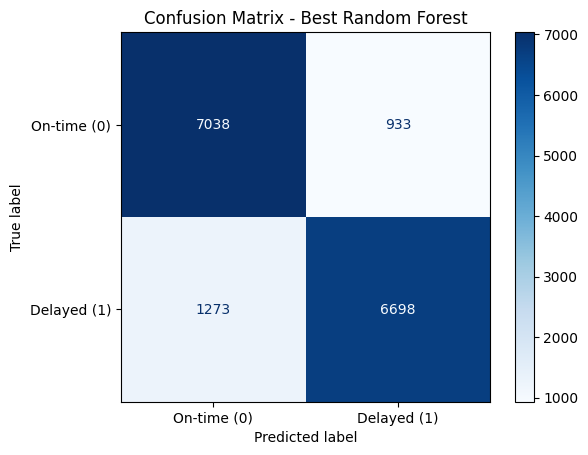

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['On-time (0)', 'Delayed (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Random Forest")
plt.show()
